In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython.display import display
import neurokit2 as nk
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pickle

# Set matplotlib parameters for displaying graphs
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [8, 4]  # Bigger images
plt.rcParams['font.size']= 14

pd.set_option('display.max_columns', None)

p = 'data/part206/part206_pilot_ecg_signals_elgendi2010.p'
p2 = 'data/part206/part206_pilot_ecg_signals_elgendi2010metadata.p'
ecg = pickle.load(open(p,"rb"))
ecg_info = pickle.load(open(p2,'rb'))
eda = pickle.load(open('data/part206/part206_pilot_eda_signals.p',"rb"))
rsp = pickle.load(open('data/part206/part206_pilot_rsp_signals.p',"rb"))
baseline_fn = 'data/part206/part206_baseline_ecg_signals.p'
baseline2_fn = 'data/part206/part206_baseline_eda_signals.p'
baseline3_fn = 'data/part206/part206_baseline_rsp_signals.p'
ecg_baseline = pickle.load(open(baseline_fn,"rb"))
eda_baseline = pickle.load(open(baseline2_fn,"rb"))
rsp_baseline = pickle.load(open(baseline3_fn,"rb"))

In [2]:
data_file = 'data/part206/part206_pilot.acq'
rate = 2000

data, sampling_rate = nk.read_acqknowledge(data_file)
data = data.rename(columns={"RSP, X, RSPEC-R": "RSP", "DTU100 - Trigger View, AMI / HLT - A11": "TRIG",
                            "EDA, X, PPGED-R": "EDA", "ECG, X, RSPEC-R": "ECG"})
start_times = [317250, 1023250, 1567250, 2101250, 2659250, 3307250, 3843250, 4377250, 4913250, 5451250, 5939250, 6503250]
feedback_times = [950589, 1495874, 2029686, 2580921, 3103039, 3767436, 4295163, 4844705, 5378331, 5858753, 6393158, 6956801]
taskload_settings = [3.0, 3.0, 2.0 ,3.0 ,2.0, 4.0 ,2.0 ,4.0,4.0,2.0,4.0,3.0]
trust_settings = [1,1,1,1,0,1,0,1,1,1,1,0]
elapsed_time_lockin=[6.30000000000000, 5.06666666666666, 7.93333333333333, 5, 8.63333333333333, 6.40000000000000, 9.10000000000000, 6.33333333333334, 6.80000000000000,5.66666666666666,5.26666666666667,7.36666666666667]

durations = [100,100,100,100,100,100,100,100,100,100,100,100]
#durations = [633339, 472624, 462436, 479671, 443789, 460186, 451913, 467455, 465081, 407503, 453908, 453551]

In [3]:
events = {}
events['onset'] = start_times
events['duration'] = durations
events['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
events['condition'] =  taskload_settings
#events['trust'] = trust_settings DOES NOT WORK!

events_feedback = {}
events_feedback['onset'] = feedback_times
events_feedback['duration'] = durations
events_feedback['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
events_feedback['condition'] =  taskload_settings

In [4]:
ecg_pilot_interval = nk.epochs_create(ecg, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
eda_pilot_interval = nk.epochs_create(eda, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
rsp_pilot_interval = nk.epochs_create(rsp, events, sampling_rate=rate, epochs_start=0, epochs_end=50)

ecg_trust_interval = nk.epochs_create(ecg,events,sampling_rate=rate,epochs_start=50,epochs_end=70)
eda_trust_interval = nk.epochs_create(eda,events,sampling_rate=rate,epochs_start=50,epochs_end=70)
rsp_trust_interval = nk.epochs_create(rsp,events,sampling_rate=rate,epochs_start=50,epochs_end=70)

ecg_trust_event = nk.epochs_create(ecg,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=10)
eda_trust_event = nk.epochs_create(eda,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=10)
rsp_trust_event = nk.epochs_create(rsp,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=10)


In [5]:
pi_high_tl = {}
hc=1
pi_med_tl = {}
mc=1
pi_low_tl = {}
lc=1
for i in range(1,13):
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = ecg_pilot_interval[i]
        hc+=1
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = ecg_pilot_interval[i]
        mc+=1
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = ecg_pilot_interval[i]
        lc+=1

for i in range(1,13):
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = eda_pilot_interval[i]
        hc+=1
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = eda_pilot_interval[i]
        mc+=1
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = eda_pilot_interval[i]
        lc+=1
            
for i in range(1,13):
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = rsp_pilot_interval[i]
        hc+=1
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = rsp_pilot_interval[i]
        mc+=1
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = rsp_pilot_interval[i]
        lc+=1

In [6]:
#peaks, info = nk.ecg_peaks(ecg, sampling_rate=rate)
#hrv_freq = nk.hrv_frequency(peaks, sampling_rate=2000, show=True)

<IPython.core.display.Javascript object>


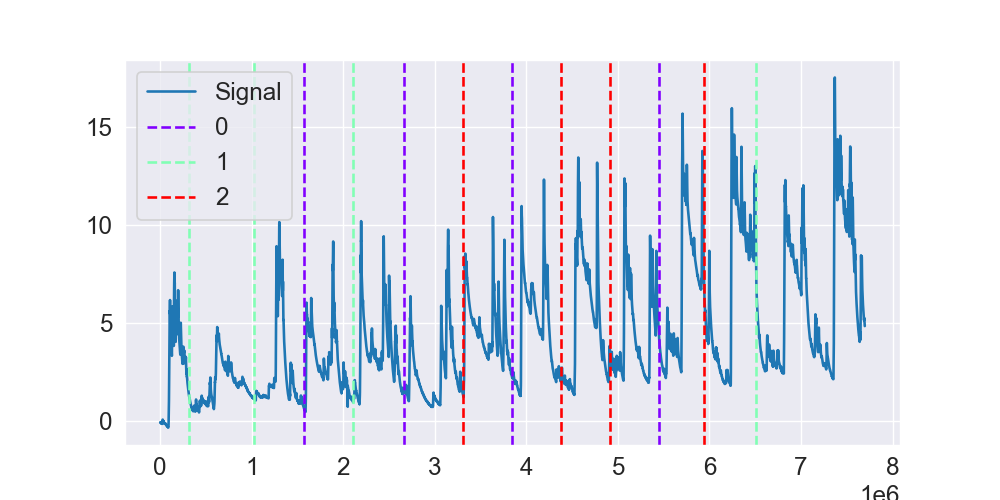

In [7]:
plot = nk.events_plot(events, eda['EDA_Clean'])

<IPython.core.display.Javascript object>


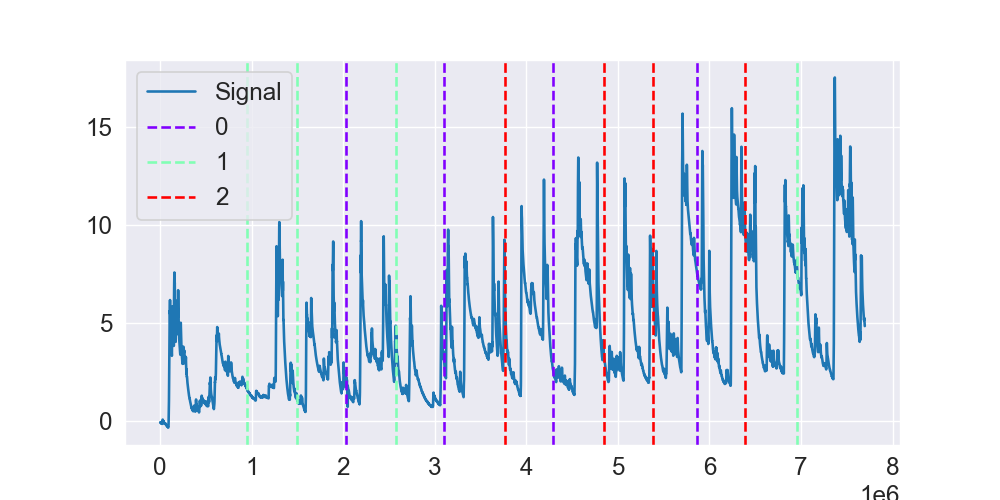

In [8]:
plot = nk.events_plot(events_feedback, eda['EDA_Clean'])

<IPython.core.display.Javascript object>


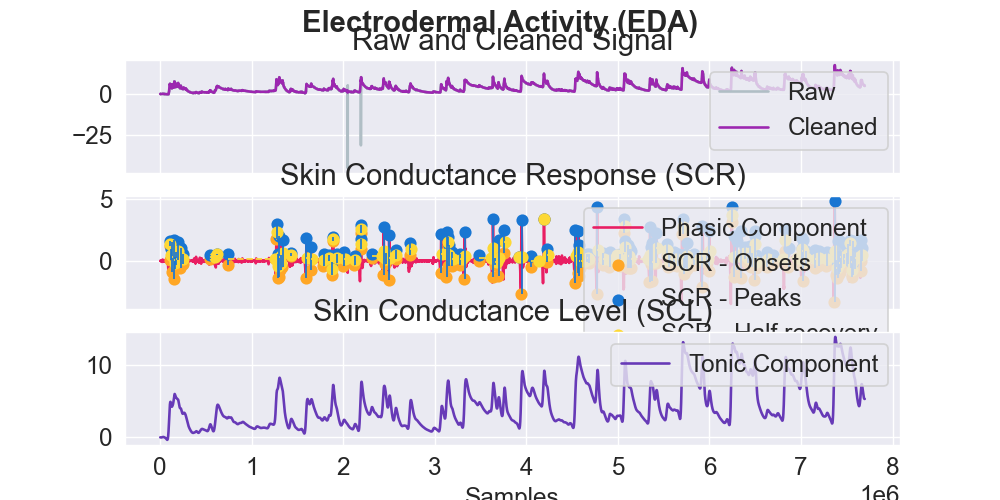

<IPython.core.display.Javascript object>


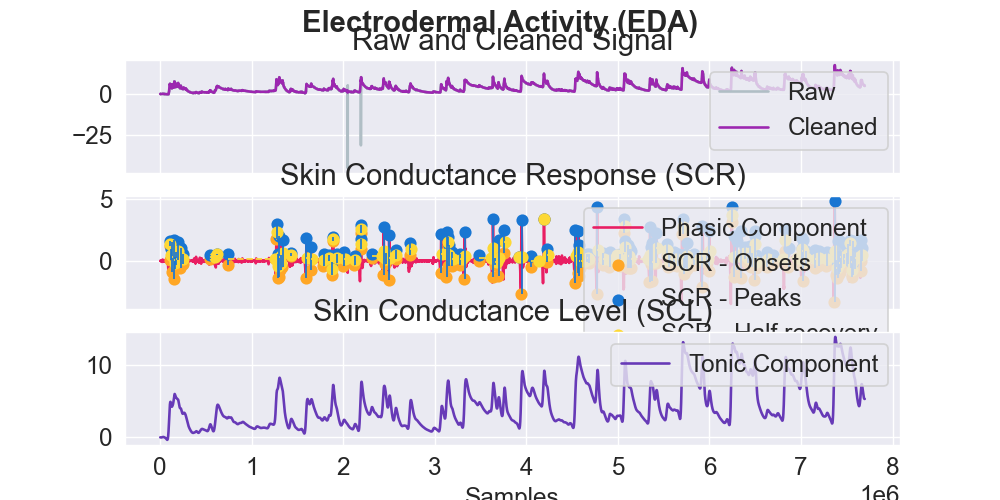

In [9]:
nk.eda_plot(eda)

In [10]:
display(nk.eda_analyze(eda_pilot_interval, sampling_rate=rate))
display(nk.eda_analyze(eda_baseline,sampling_rate=rate))

C:\Users\BIOPACMan\Anaconda3\lib\site-packages\neurokit2\eda\eda_intervalrelated.py:116: RuntimeWarning: invalid value encountered in double_scalars
  output["SCR_Peaks_Amplitude_Mean"] = np.nansum(amplitude) / np.sum(peaks)


,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean
1,0.0,NaN
2,0.0,NaN
3,2.0,2.540143
4,3.0,0.734894
5,1.0,0.951874
6,1.0,3.775457
7,1.0,0.006630
8,0.0,NaN
9,1.0,0.000421
10,1.0,0.900512


,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean
0,26.0,0.008195


In [11]:
display(nk.ecg_analyze(ecg_pilot_interval, sampling_rate=rate))
display(nk.ecg_analyze(ecg_trust_interval, sampling_rate=rate))
display(nk.ecg_analyze(ecg_baseline, sampling_rate=rate))

,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
1,99.060959,42.404795,606.719512,78.721226,42.609718,0.129749,0.069892,583.75,54.48555,0.093337,88.750,14.634146,46.341463,376.5,3.904762,NaN,NaN,NaN,0.019735,0.000617,NaN,NaN,0.969691,-3.925368,30.129620,106.910318,0.281821,10119.595453,3.548346,4.712133,1517.419190,0.414634,0.410256,0.625000,0.187500,53.955420,54.175910,53.737778,60.256410,0.718892,0.281108,25.581701,15.996826,0.351619,0.648381,63.395082,86.086465,0.378712,0.621288,48.339218,61.914368,0.580957,1.032363
2,103.361214,13.634471,580.476471,29.096709,13.716314,0.050126,0.023488,575.50,25.20420,0.043795,33.500,1.176471,9.411765,130.0,4.473684,NaN,NaN,NaN,0.023717,0.000445,NaN,NaN,0.981573,-3.741565,9.698898,40.242001,0.241014,1226.173307,4.149131,3.795522,667.877359,0.364706,0.370370,0.366667,0.000000,50.177096,50.182366,50.170999,49.382716,0.467228,0.532772,6.629616,7.079369,0.519856,0.480144,29.014901,27.884659,0.516967,0.483033,21.045383,20.342956,0.682633,1.206601
3,103.125224,29.499899,582.576471,50.543328,29.637458,0.086758,0.050637,569.00,37.80630,0.066443,56.500,8.235294,22.352941,242.0,2.931034,NaN,NaN,NaN,0.075812,0.003930,NaN,NaN,0.950717,-2.579505,20.956848,67.988275,0.308242,4476.203813,3.244203,4.357880,882.271134,0.458824,0.476190,0.600000,0.045455,54.278075,54.585577,53.977391,50.000000,0.567664,0.432336,15.810722,13.798027,0.497825,0.502175,47.970311,48.179402,0.503900,0.496100,35.715050,35.437553,0.538446,0.737599
4,105.786088,14.660796,567.189655,23.349374,14.745939,0.041167,0.025848,565.50,25.94550,0.045881,34.000,0.000000,17.241379,96.0,4.350000,NaN,NaN,NaN,0.140113,0.001879,NaN,NaN,0.986768,-1.965306,10.426953,31.493845,0.331079,1031.651442,3.020426,3.720503,380.499354,0.390805,0.392857,0.515152,0.043478,49.330689,49.333303,49.328987,54.761905,0.551387,0.448613,7.743023,6.984226,0.426843,0.573157,20.575936,23.843094,0.439147,0.560853,15.545475,17.568047,0.571001,1.400893
5,108.818264,14.051970,551.516667,26.816213,14.116641,0.048623,0.025479,550.25,20.75640,0.037722,25.250,1.111111,10.000000,119.5,4.736842,NaN,NaN,NaN,0.039130,0.001154,NaN,NaN,0.971342,-3.240871,9.981973,36.394571,0.274271,1141.307970,3.646030,3.764373,530.782764,0.300000,0.306818,0.370370,0.000000,53.175041,53.089784,53.258822,52.272727,0.652692,0.347308,8.072910,5.888886,0.516882,0.483118,26.165690,25.296668,0.526402,0.473598,19.362531,18.365735,0.541190,0.976010
6,102.672696,14.230673,584.345238,26.143945,14.314919,0.044741,0.024353,587.75,23.72160,0.040360,30.125,0.000000,16.666667,121.5,4.666667,NaN,NaN,NaN,0.027699,0.000463,NaN,NaN,0.983542,-3.586368,10.122176,35.676794,0.283719,1134.513317,3.524617,3.761780,502.988126,0.369048,0.378049,0.419355,0.000000,48.881789,48.905272,48.859531,51.219512,0.482762,0.517238,7.034107,7.280947,0.496985,0.503015,25.151123,25.303254,0.495925,0.504075,18.466966,18.618094,0.604993,1.491655
7,107.321157,14.483740,559.215909,27.200701,14.566300,0.048641,0.025900,552.00,21.49770,0.038945,34.375,1.136364,17.045455,126.0,3.259259,NaN,NaN,NaN,0.037004,0.000523,NaN,NaN,0.986060,-3.296727,10.299929,37.268353,0.276372,1205.936183,3.618312,3.788294,539.394052,0.352273,0.360465,0.322581,0.040000,50.972763,51.003613,50.939820,51.162791,0.465227,0.534773,7.026011,7.532874,0.524838,0.475162,26.999318,25.689822,0.520607,0.479393,19.727240,18.930282,0.551650,0.802767
8,100.366968,12.320665,597.789157,21.305290,12.386765,0.035640,0.020610,597.00,17.04990,0.028559,23.750,0.000000,9.638554,109.5,3.772727,NaN,NaN,NaN,0.059920,0.001847,NaN,NaN,0.970098,-2.814752,8.758766,28.190813,0.310696,775.7

,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
1,102.753269,17.381743,582.727273,43.489239,17.298145,0.074631,0.029828,589.00,63.75180,0.108237,71.500,0.000000,18.181818,142.5,4.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.231635,59.539090,0.205439,2287.897637,4.867631,4.066407,1159.257328,0.242424,0.281250,0.333333,0.000000,37.214612,36.789239,37.649305,62.500000,0.376707,0.623293,7.664329,9.858679,0.362004,0.637996,35.822760,47.556630,0.362624,0.637376,25.903784,34.342587,0.322841,0.810930
2,101.916451,14.506733,588.348485,23.231338,14.654824,0.039486,0.024657,581.50,22.23900,0.038244,40.500,0.000000,21.212121,81.5,4.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.362525,30.755898,0.336928,1001.253142,2.967993,3.707514,365.133112,0.303030,0.343750,0.181818,0.000000,43.478261,43.655740,43.298751,53.125000,0.437539,0.562461,6.893779,7.816185,0.456449,0.543551,20.778998,22.675064,0.454501,0.545499,15.480487,16.959529,0.277467,2.197225
3,100.738563,13.880911,594.863636,17.708258,14.089423,0.029769,0.023335,593.50,16.30860,0.027479,25.500,0.000000,15.151515,61.0,3.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.962727,23.276907,0.428009,728.539922,2.336399,3.569423,217.536588,0.636364,0.687500,0.863636,0.500000,47.186147,47.173154,47.200431,43.750000,0.365365,0.634635,6.027825,7.944363,0.599354,0.400646,18.020502,14.733496,0.563067,0.436933,13.436390,11.836148,0.280760,2.197225
4,100.896580,16.985978,595.469697,25.222429,17.197200,0.042357,0.028525,592.50,22.23900,0.037534,28.000,0.000000,24.242424,96.0,4.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.160257,33.444810,0.363592,1277.677830,2.750337,3.813391,367.938052,0.393939,0.419355,0.615385,0.166667,55.569155,55.791350,55.350030,45.161290,0.552977,0.447023,9.074512,8.158955,0.539762,0.460238,24.571408,22.689232,0.541315,0.458685,18.521621,17.049484,0.184860,inf
5,99.721781,21.515186,600.500000,49.585540,21.404476,0.082574,0.035829,589.00,37.06500,0.062929,53.000,3.125000,34.375000,194.0,2.461538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.135250,64.747039,0.233760,3078.643458,4.277897,4.195330,1107.924588,0.437500,0.483871,0.600000,0.125000,36.133603,37.344242,34.843359,51.612903,0.251725,0.748275,7.759134,13.377687,0.517466,0.482534,46.575870,44.976298,0.503124,0.496876,33.387990,33.180038,0.366711,1.252763
6,103.638614,15.691872,578.808824,20.936779,15.931241,0.036172,0.027111,577.50,18.90315,0.032733,27.500,0.000000,23.529412,82.0,4.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.265089,26.347281,0.427562,932.438709,2.338844,3.676590,246.488679,0.323529,0.363636,0.333333,0.000000,51.360947,51.282975,51.441949,54.545455,0.567332,0.432668,8.487123,7.411720,0.537720,0.462280,19.320294,17.913834,0.542298,0.457702,14.921545,13.708374,0.195129,inf
7,99.273655,25.393516,606.093750,38.597267,25.493621,0.063682,0.041897,605.75,37.43565,0.061800,58.375,6.250000,40.625000,147.0,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.026713,49.912515,0.361166,2826.674877,2.768808,4.158246,552.792781,0.312500,0.354839,0.454545,0.000000,60.457240,60.682383,60.239369,41.935484,0.571543,0.428457,13.799155,11.947629,0.641159,0.358841,39.966139,29.899279,0.632947,0.367053,29.897399,22.767441,0.340161,inf
8,102.094477,23.038362,589.921875,33.173082,23.367333,0.056233,0.039053,584.00,28.54005,0.048870,37.875,6.250000,25.000000,134.5,3.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.523200,44.269805,0.373239,2298.008492,2.679251,4.068322,474.439727,0.500000,0.533333,0.625000,0.250000,54.942768,55.178524,54.700905,46.666667,0.512923,0.487077,11.859947,11.557285,0.513544,0.486456,31.724634,30.876580,

,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,99.25282,36.242965,604.663366,54.88821,36.425259,0.090775,0.059939,591.5,54.1149,0.091488,76.0,9.90099,46.534653,212.0,3.607143,NaN,NaN,NaN,0.086806,0.000833,NaN,NaN,0.990498,-2.444074,25.756547,73.473497,0.350556,5945.224122,2.852614,4.481138,838.366214,0.247525,0.252525,0.16,0.0,50.269667,50.253776,50.290643,58.585859,0.656062,0.343938,20.862374,15.105354,0.350106,0.649894,43.474089,59.231397,0.38359,0.61641,34.097178,43.223432,0.523494,0.87294


In [12]:
display(nk.rsp_analyze(rsp_pilot_interval, sampling_rate=rate))
display(nk.rsp_analyze(rsp_baseline, sampling_rate=rate))

,RSP_Rate_Mean,RSP_Amplitude_Mean,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,RRV_MadBB,RRV_MCVBB,RRV_VLF,RRV_LF,RRV_HF,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn
1,14.953229,5.557176,2978.241588,4102.750000,2391.432620,3061.217008,0.582885,0.725913,3722.75,1752.06255,0.470637,NaN,NaN,0.006994,NaN,NaN,NaN,2164.607305,2598.533273,1.200464,0.030717,-inf
2,18.176085,6.868667,704.130820,3339.428571,538.715954,732.393098,0.161320,0.210854,3360.50,548.19135,0.163128,NaN,NaN,0.012167,NaN,NaN,NaN,517.880126,558.775387,1.078967,0.026595,inf
3,18.620711,4.016980,974.032745,3190.250000,678.854741,1011.362568,0.212790,0.305315,3223.25,506.67855,0.157195,NaN,NaN,0.006963,NaN,NaN,NaN,715.141330,640.515728,0.895649,0.026595,inf
4,16.973114,6.366328,594.781753,3247.961538,691.014425,621.109759,0.212753,0.183125,3606.00,454.41690,0.126017,NaN,NaN,0.010108,NaN,NaN,NaN,439.190923,872.990954,1.987725,0.027518,0.510826
5,14.993828,4.341927,757.258918,3409.791667,659.181292,791.259795,0.193320,0.222084,3404.25,898.45560,0.263922,NaN,NaN,0.002802,NaN,NaN,NaN,559.505167,745.649998,1.332695,0.191709,1.386294
6,16.981353,13.509364,348.769743,3477.923077,268.885652,362.987436,0.077312,0.100281,3417.50,187.54890,0.054879,NaN,NaN,0.006686,NaN,NaN,NaN,256.670878,280.569150,1.093109,0.087011,-inf
7,13.211567,5.902502,3160.693248,4543.900000,2554.012190,3207.674032,0.562075,0.695590,3820.50,505.93725,0.132427,NaN,NaN,0.003838,NaN,NaN,NaN,2268.168060,2810.937599,1.239299,0.150051,0.287682
8,20.985169,3.888906,1846.664037,3001.625000,1206.069933,1911.319229,0.401806,0.615221,2696.00,906.60990,0.336280,NaN,NaN,0.012980,NaN,NaN,NaN,1351.506788,1040.499288,0.769881,0.068993,-inf
9,16.895188,3.446883,3675.190675,3808.666667,3147.633038,3732.586364,0.826440,0.964955,2597.75,625.65720,0.240846,NaN,NaN,0.001384,NaN,NaN,NaN,2639.337130,3584.562316,1.358130,0.335308,1.011601
10,17.918113,10.021395,287.234258,3324.964286,225.433212,292.911320,0.067800,0.086387,3386.00,191.62605,0.056594,NaN,NaN,0.008853,NaN,NaN,NaN,207.119581,242.366965,1.170179,0.026595,inf


,RSP_Rate_Mean,RSP_Amplitude_Mean,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,RRV_MadBB,RRV_MCVBB,RRV_VLF,RRV_LF,RRV_HF,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn
0,10.437613,5.600839,758.400434,5770.722222,674.932224,800.019171,0.116958,0.131422,5882.5,615.279,0.104595,NaN,NaN,0.002198,NaN,NaN,NaN,565.698981,768.798853,1.359025,0.133531,-inf
